In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pymatgen.util.plotting_utils import get_publication_quality_plot

In [8]:
import numpy as np
import pandas as pd
import math

In [15]:
vol_cons = math.pow(0.529177,3)

In [18]:
vol_cons

0.14818453429566825

In [11]:
datafile = pd.read_csv('results.csv')

In [12]:
datafile = datafile.sort('alat')

In [13]:
datafile.head(10)

,filename,ecut,nkpts,alat,energy,total_force,unit_cell volume,cpu_time
0,Fe_bcc_5.15_11.out,50,112,5.15,-329.253726,0,68.2954,18.72
2,Fe_bcc_5.2_11.out,50,112,5.20,-329.257518,0,70.3040,23.53
1,Fe_bcc_5.25_11.out,50,112,5.25,-329.260028,0,72.3516,17.93
12,Fe_bcc_5.3_11.out,50,112,5.30,-329.261786,0,74.4385,19.41
3,Fe_bcc_5.31_11.out,50,112,5.31,-329.261959,0,74.8606,20.03
4,Fe_bcc_5.32_11.out,50,112,5.32,-329.262167,0,75.2844,17.82
5,Fe_bcc_5.33_11.out,50,112,5.33,-329.262348,0,75.7097,19.50
6,Fe_bcc_5.34_11.out,50,112,5.34,-329.262348,0,76.1367,19.22
7,Fe_bcc_5.35_11.out,50,112,5.35,-329.262454,0,76.5652,16.36
8,Fe_bcc_5.36_11.out,50,112,5.36,-329.262423,0,76.9953,16.35


In [16]:
datafile['unit cell volume (A^3)'] = datafile['unit_cell volume'] * vol_cons

In [17]:
datafile

,filename,ecut,nkpts,alat,energy,total_force,unit_cell volume,cpu_time,unit cell volume (A^3)
0,Fe_bcc_5.15_11.out,50,112,5.15,-329.253726,0,68.2954,18.72,10.120322
2,Fe_bcc_5.2_11.out,50,112,5.20,-329.257518,0,70.3040,23.53,10.417965
1,Fe_bcc_5.25_11.out,50,112,5.25,-329.260028,0,72.3516,17.93,10.721388
12,Fe_bcc_5.3_11.out,50,112,5.30,-329.261786,0,74.4385,19.41,11.030634
3,Fe_bcc_5.31_11.out,50,112,5.31,-329.261959,0,74.8606,20.03,11.093183
4,Fe_bcc_5.32_11.out,50,112,5.32,-329.262167,0,75.2844,17.82,11.155984
5,Fe_bcc_5.33_11.out,50,112,5.33,-329.262348,0,75.7097,19.50,11.219007
6,Fe_bcc_5.34_11.out,50,112,5.34,-329.262348,0,76.1367,19.22,11.282281
7,Fe_bcc_5.35_11.out,50,112,5.35,-329.262454,0,76.5652,16.36,11.345779
8,Fe_bcc_5.36_11.out,50,112,5.36,-329.262423,0,76.9953,16.35,11.409513


In [19]:
datafile.ix[datafile['energy'].idxmin()]

filename                  Fe_bcc_5.37_11.out
ecut                                      50
nkpts                                    112
alat                                    5.37
energy                             -329.2625
total_force                                0
unit_cell volume                     77.4271
cpu_time                               19.37
unit cell volume (A^3)               11.4735
Name: 9, dtype: object

In [21]:
x = datafile['unit cell volume (A^3)'].tolist()
y_energy = datafile['energy'].tolist()

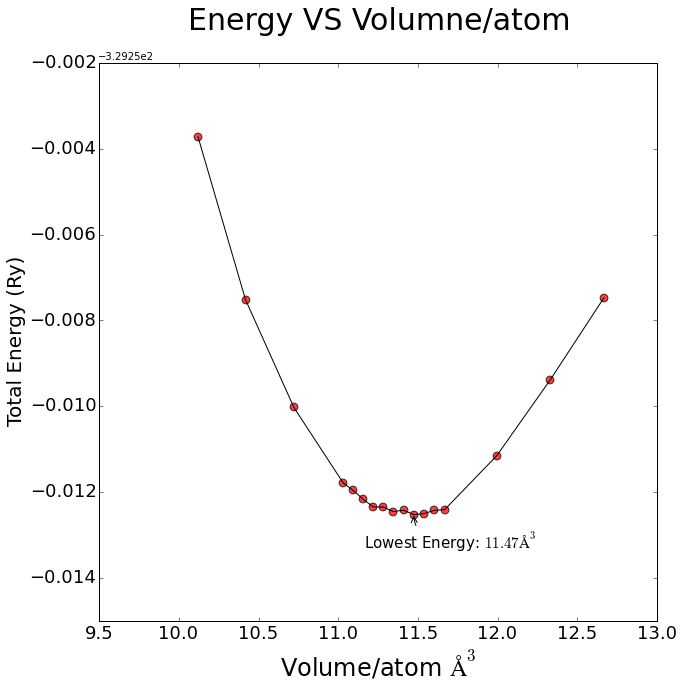

In [24]:
fig, ax0=plt.subplots(nrows=1)
fig.set_size_inches(10,10)

ax0.scatter(x, y_energy,marker='o',alpha=0.75,s=60,c='r')
ax0.plot(x,y_energy,c='black')
ax0.set_title('Energy VS Volumne/atom',fontsize=30,y=1.05)
ax0.set_xlabel(r'Volume/atom $\AA^3$',fontsize=24)
ax0.set_ylabel(r'Total Energy (Ry)',fontsize=20)
ax0.set_ylim(-329.265,-329.252)
ax0.tick_params(labelsize = 18)
ax0.annotate(r'Lowest Energy: $11.47 \AA^3$', xy=(11.4735, -329.2625),  xycoords='data',
                xytext=(-50, -35), textcoords='offset points',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90"),fontsize=15
                )

# ax1.scatter(x,y_conver,marker='o',alpha=0.75, s=60,c='b')
# ax1.plot(x,y_conver,c='black')
# ax1.set_title('Force Convergence Vs K-points',fontsize=24,y=1.05)
# ax1.set_xlabel('# of K-points',fontsize=24)
# ax1.set_ylabel(r'Force Converge $meV/\AA$',fontsize=18)
# # ax1.set_yscale('log')
# ax1.set_ylim(-1,40)
# ax1.annotate(r'Convergence < 5 $meV/\AA$ # Kpoints: 205', xy=(207, 5),  xycoords='data',
#                 xytext=(0.95, 0.95), textcoords='axes fraction',
#                 arrowprops=dict(facecolor='black', shrink=0.05),
#                 horizontalalignment='right', verticalalignment='top',fontsize=16
#                 )
# ax1.tick_params(labelsize = 18)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [18]:
plt.show()